* [1.DataOverview](#1.DataOverview)
* [2.Visualization](#2.Visualization)
    * [2.1 visualization for crime type](#21)
    * [2.2 visualization for the number of crime](#22)
    * [2.3 visualization for 'traffic-accident'](#23)
    * [2.4 visualization for 'larceny'](#24)
    * [2.5 visualization for 'NEIGHBORHOOD_ID'](#25)
* [3.Suggestion](#3.Suggestion)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import seaborn as sns
import geopandas as gpd
import folium
from folium import plugins
import datetime
import math

In [2]:
os.listdir('../input/denver-crime-data')

['crime.xml', 'crime', 'offense_codes.csv', 'crime.csv', 'crime_1']

# 1.DataOverview

The crime data size is 509346,and the variables include INCIDENT_ID,OFFENSE_ID,and so on.

'LAST_OCCURRENCE_DATE', 'INCIDENT_ADDRESS', 'GEO_LAT', 'GEO_LON','GEO_Y', 'GEO_X' have missing value

If you want to use these variables,you have to watch out missing value.

In this kernel,I will use the Geo_LON and GEO_LAT to visualize the data,so I will remove the missing value from these variables.

In [3]:
data=pd.read_csv('../input/denver-crime-data/crime.csv')
data.head()

INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2016376978   2016376978521300          5213                       0   
1  20186000994  20186000994239900          2399                       0   
2  20166003953  20166003953230500          2305                       0   
3    201872333    201872333239900          2399                       0   
4   2017411405   2017411405230300          2303                       0   

                OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID  \
0  weapon-unlawful-discharge-of          all-other-crimes   
1                   theft-other                   larceny   
2      theft-items-from-vehicle  theft-from-motor-vehicle   
3                   theft-other                   larceny   
4                theft-shoplift                   larceny   

    FIRST_OCCURRENCE_DATE   LAST_OCCURRENCE_DATE          REPORTED_DATE  \
0   6/15/2016 11:31:00 PM                    NaN  6/15/2016 11:31:00 PM   
1  10/11/2017 12:30:00 PM  10/11/2017 4:55:00 PM   1/29/2018 5:53:00 PM   
2     3/4/2016 8:00:00 PM   4/25/2016 8:00:00 AM   4/26/2016 9:02:00 PM   
3    1/30/2018 7:20:00 PM                    NaN  1/30/2018 10:29:00 PM   
4    6/22/2017 8:53:00 PM                    NaN   6/23/2017 4:09:00 PM   

      INCIDENT_ADDRESS      GEO_X      GEO_Y     GEO_LON    GEO_LAT  \
0                  NaN  3193983.0  1707251.0 -104.809881  39.773188   
1                  NaN  3201943.0  1711852.0 -104.781434  39.785649   
2  2932 S JOSEPHINE ST  3152762.0  1667011.0 -104.957381  39.663490   
3  705 S COLORADO BLVD  3157162.0  1681320.0 -104.941440  39.702698   
4       2810 E 1ST AVE  3153211.0  1686545.0 -104.955370  39.717107   

   DISTRICT_ID  PRECINCT_ID             NEIGHBORHOOD_ID  IS_CRIME  IS_TRAFFIC  
0            5          521                   montbello         1           0  
1            5          522  gateway-green-valley-ranch         1           0  
2            3          314                   wellshire         1           0  
3            3          312                     belcaro         1           0  
4            3          311                cherry-creek         1           0

Text(0.5, 1.0, 'counts of missing value')

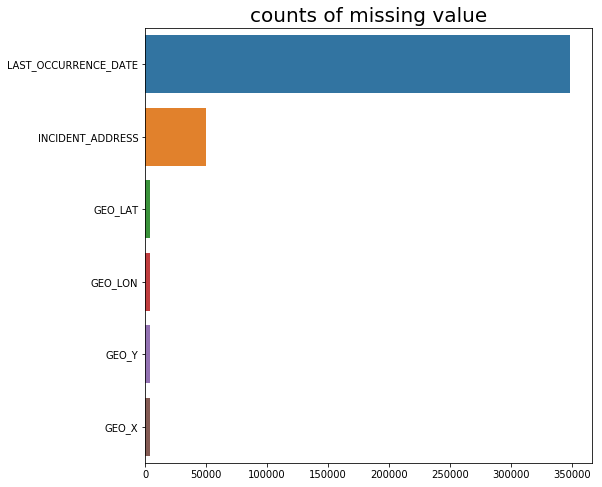

In [4]:
y=data.isnull().sum().sort_values(ascending=False)[:6].index
x=data.isnull().sum().sort_values(ascending=False)[:6]
plt.figure(figsize=(8,8))
sns.barplot(x,y)
plt.title("counts of missing value",size=20)

In [5]:
data=data.dropna(subset=['GEO_LAT','GEO_LON'])
data.isnull().sum()

INCIDENT_ID                    0
OFFENSE_ID                     0
OFFENSE_CODE                   0
OFFENSE_CODE_EXTENSION         0
OFFENSE_TYPE_ID                0
OFFENSE_CATEGORY_ID            0
FIRST_OCCURRENCE_DATE          0
LAST_OCCURRENCE_DATE      346962
REPORTED_DATE                  0
INCIDENT_ADDRESS           45661
GEO_X                          0
GEO_Y                          0
GEO_LON                        0
GEO_LAT                        0
DISTRICT_ID                    0
PRECINCT_ID                    0
NEIGHBORHOOD_ID                0
IS_CRIME                       0
IS_TRAFFIC                     0
dtype: int64

In [6]:
data['REPORTED_DATE']=data.REPORTED_DATE.apply(lambda x:datetime.datetime.strptime(x,'%m/%d/%Y %I:%M:%S %p'))
data['year']=data.REPORTED_DATE.apply(lambda x:x.strftime('%Y'))
data['month']=data.REPORTED_DATE.apply(lambda x:x.strftime('%m'))
data['hour']=data.REPORTED_DATE.apply(lambda x:x.strftime('%H'))
data.head()

INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
0   2016376978   2016376978521300          5213                       0   
1  20186000994  20186000994239900          2399                       0   
2  20166003953  20166003953230500          2305                       0   
3    201872333    201872333239900          2399                       0   
4   2017411405   2017411405230300          2303                       0   

                OFFENSE_TYPE_ID       OFFENSE_CATEGORY_ID  \
0  weapon-unlawful-discharge-of          all-other-crimes   
1                   theft-other                   larceny   
2      theft-items-from-vehicle  theft-from-motor-vehicle   
3                   theft-other                   larceny   
4                theft-shoplift                   larceny   

    FIRST_OCCURRENCE_DATE   LAST_OCCURRENCE_DATE       REPORTED_DATE  \
0   6/15/2016 11:31:00 PM                    NaN 2016-06-15 23:31:00   
1  10/11/2017 12:30:00 PM  10/11/2017 4:55:00 PM 2018-01-29 17:53:00   
2     3/4/2016 8:00:00 PM   4/25/2016 8:00:00 AM 2016-04-26 21:02:00   
3    1/30/2018 7:20:00 PM                    NaN 2018-01-30 22:29:00   
4    6/22/2017 8:53:00 PM                    NaN 2017-06-23 16:09:00   

      INCIDENT_ADDRESS  ...     GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID  \
0                  NaN  ... -104.809881  39.773188            5          521   
1                  NaN  ... -104.781434  39.785649            5          522   
2  2932 S JOSEPHINE ST  ... -104.957381  39.663490            3          314   
3  705 S COLORADO BLVD  ... -104.941440  39.702698            3          312   
4       2810 E 1ST AVE  ... -104.955370  39.717107            3          311   

              NEIGHBORHOOD_ID  IS_CRIME IS_TRAFFIC  year  month hour  
0                   montbello         1          0  2016     06   23  
1  gateway-green-valley-ranch         1          0  2018     01   17  
2                   wellshire         1          0  2016     04   21  
3                     belcaro         1          0  2018     01   22  
4                cherry-creek         1          0  2017     06   16  

[5 rows x 22 columns]

I remove the data whcih LAT is less than 39

In [7]:
data=data[data.GEO_LAT>39]

# 2.Visualization

<h3 id="21">2.1 visualization for crime type</h3>

From the bar chart, we know that the most of crime type is traffic-accident in this data.

[Text(0, 0.5, 'LATITUDE'), Text(0.5, 0, 'Longitude')]

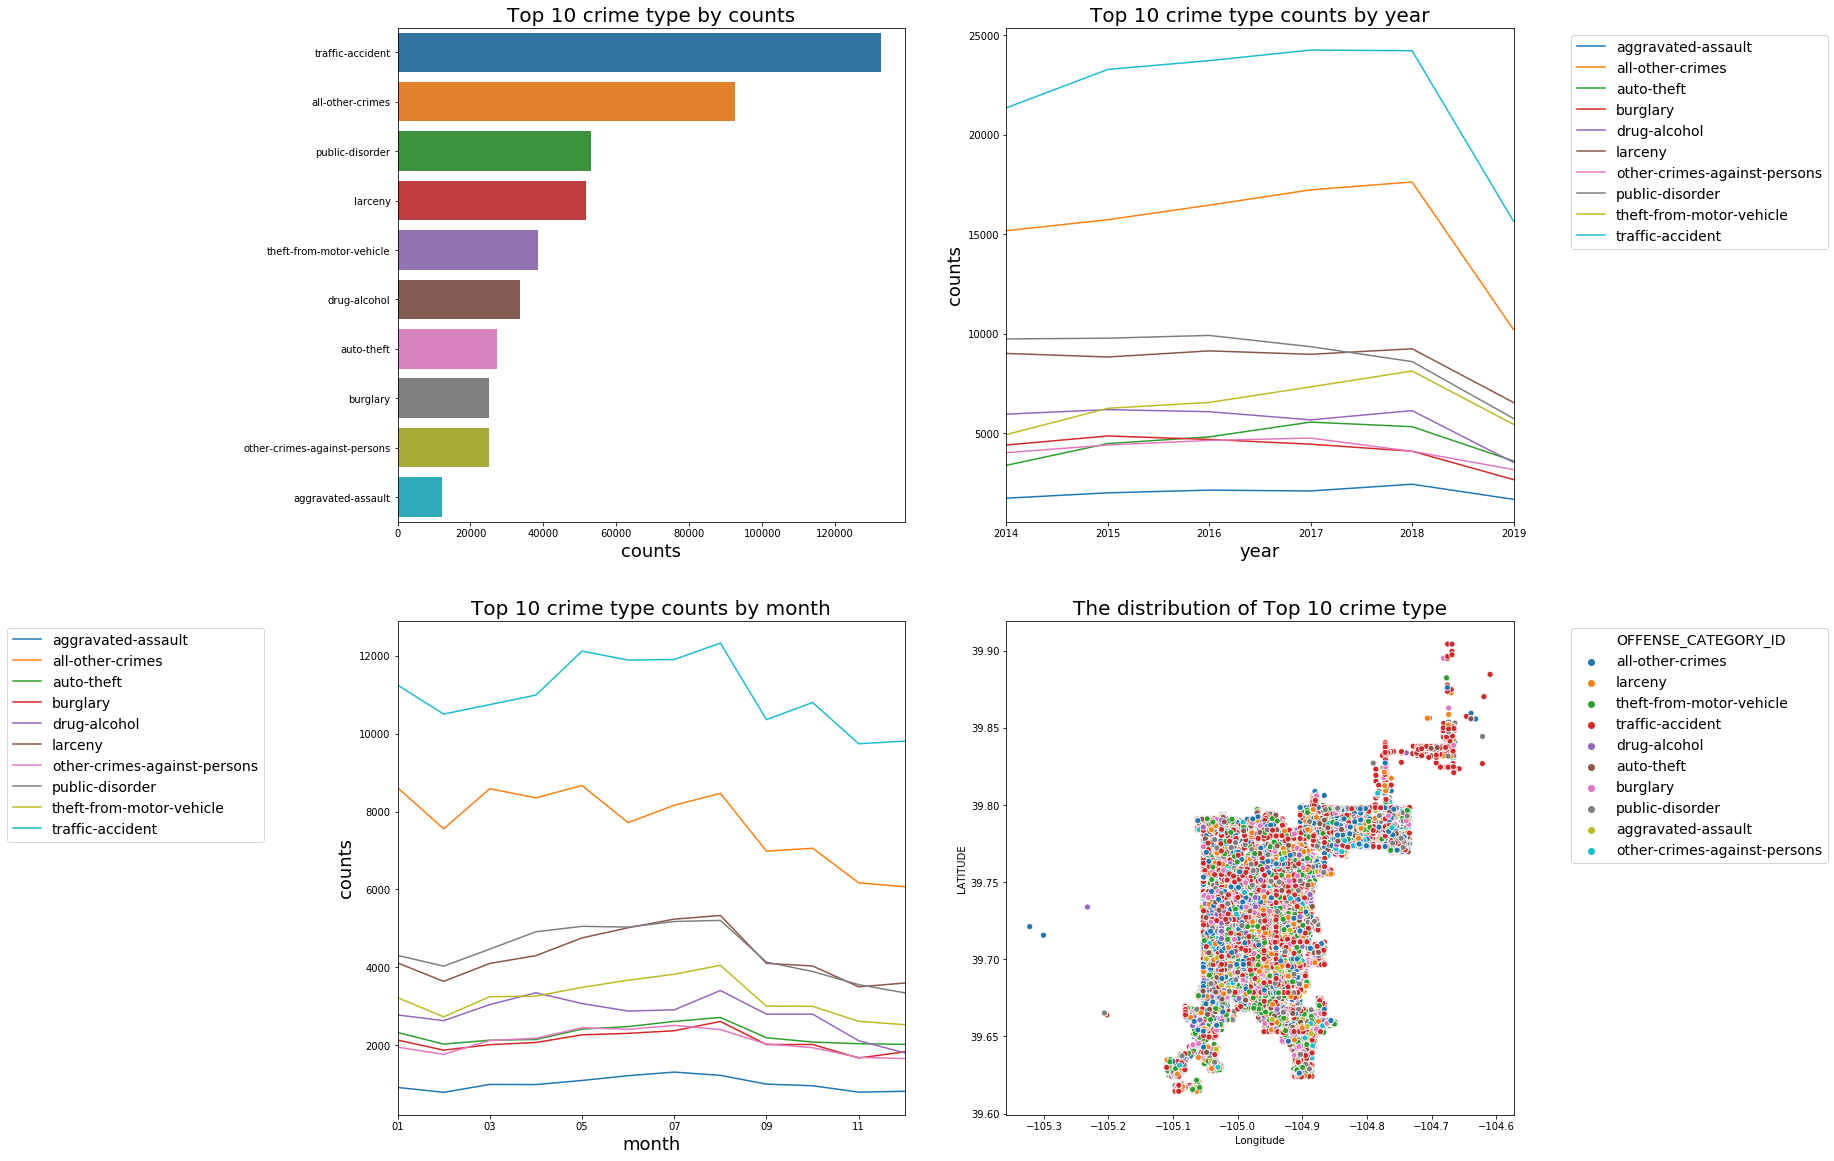

In [8]:
Top10_crime_type=data[data['OFFENSE_CATEGORY_ID'].isin(list(data.OFFENSE_CATEGORY_ID.value_counts()[:10].index[:10]))]
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=Top10_crime_type.OFFENSE_CATEGORY_ID.value_counts().index
x=Top10_crime_type.OFFENSE_CATEGORY_ID.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("Top 10 crime type by counts",size=20)
ax[0,0].set_xlabel('counts',size=18)
ax[0,0].set_ylabel('')


Top10_crime_type.groupby(['year','OFFENSE_CATEGORY_ID'])['INCIDENT_ID'].agg('count').unstack('OFFENSE_CATEGORY_ID').plot(ax=ax[0,1])
ax[0,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
ax[0,1].set_title("Top 10 crime type counts by year",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('year',size=18)

Top10_crime_type.groupby(['month','OFFENSE_CATEGORY_ID'])['INCIDENT_ID'].agg('count').unstack('OFFENSE_CATEGORY_ID').plot(ax=ax[1,0])
ax[1,0].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(-0.25,1))
ax[1,0].set_title("Top 10 crime type counts by month",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('month',size=18)

sns.scatterplot(x="GEO_LON", y="GEO_LAT", hue="OFFENSE_CATEGORY_ID",data=Top10_crime_type,ax=ax[1,1])
ax[1,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,1))
ax[1,1].set_title("The distribution of Top 10 crime type",size=20)
ax[1,1].set(xlabel='Longitude', ylabel='LATITUDE')


I use the top 2000 data to visualize on map,you can see the crime's location and type on map.

In [9]:
data_2000=data[:2000]
Long=data_2000.GEO_LON.mean()
Lat=data_2000.GEO_LAT.mean()
data_map=folium.Map([Lat,Long],zoom_start=12)

data_crime_map=plugins.MarkerCluster().add_to(data_map)
for lat,lon,label in zip(data_2000.GEO_LAT,data_2000.GEO_LON,data_2000.OFFENSE_CATEGORY_ID):
    folium.Marker(location=[lat,lon],icon=None,popup=label).add_to(data_crime_map)
data_map.add_child(data_crime_map)

data_map

<h3 id="22">2.2 visualization for the number of crime</h3>

According to the following chart,we know that the crime almost are happened at 12~18 o'clock.

Text(0, 0.5, '')

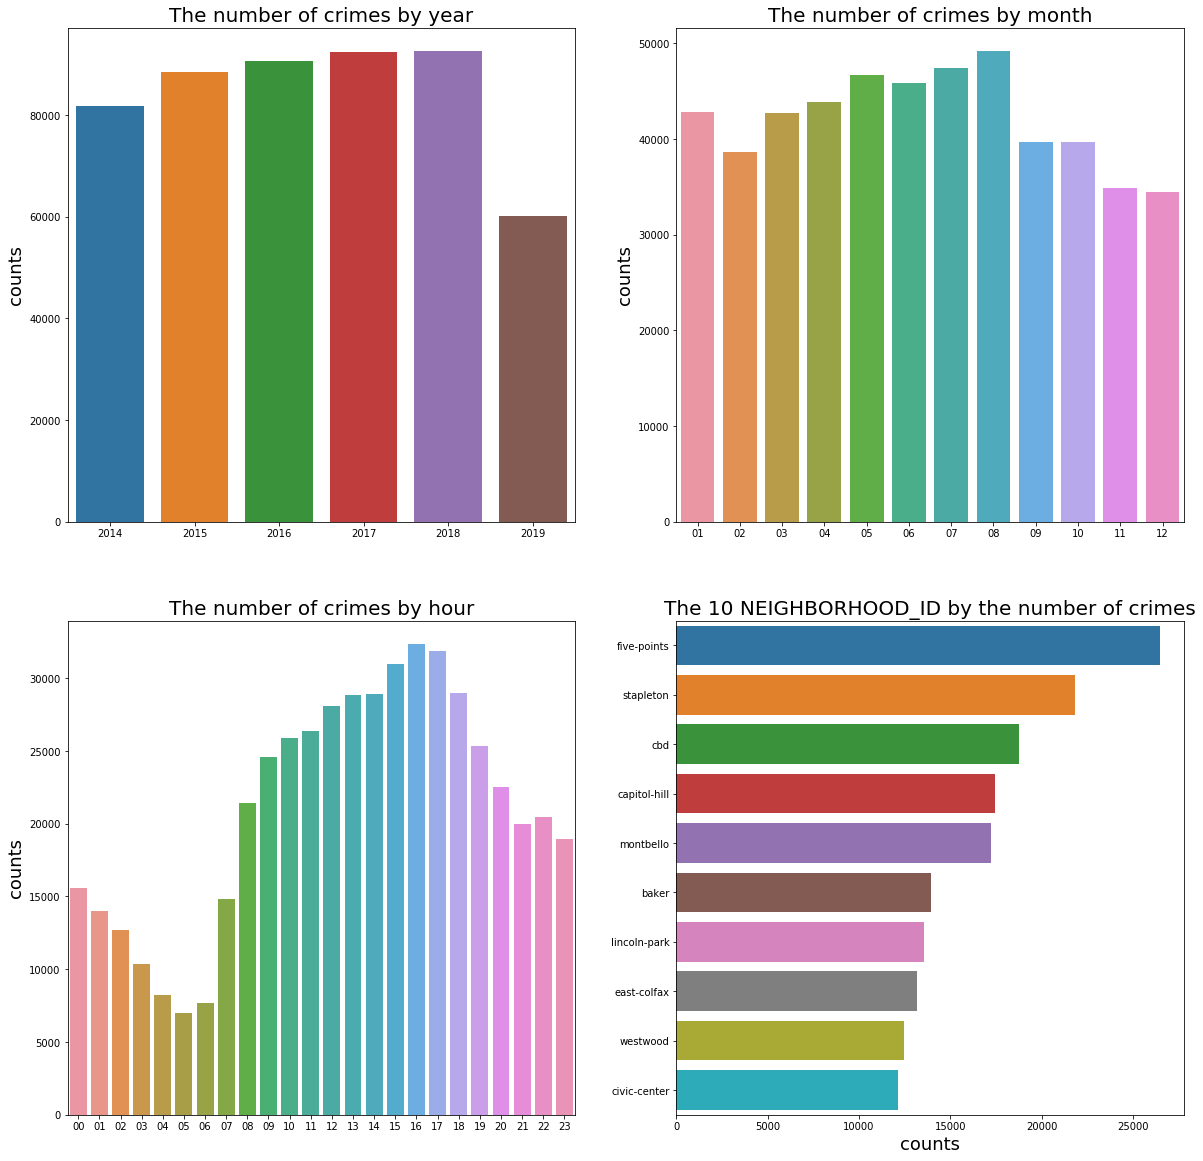

In [10]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=data.year.value_counts()
x=data.year.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The number of crimes by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')


y=data.month.value_counts()
x=data.month.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The number of crimes by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

y=data.hour.value_counts()
x=data.hour.value_counts().index
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The number of crimes by hour",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')




y=data.NEIGHBORHOOD_ID.value_counts()[:10].index
x=data.NEIGHBORHOOD_ID.value_counts()[:10]
sns.barplot(x=x,y=y,ax=ax[1,1])
ax[1,1].set_title("The 10 NEIGHBORHOOD_ID by the number of crimes",size=20)
ax[1,1].set_xlabel('counts',size=18)
ax[1,1].set_ylabel('')

In [11]:
map_all=folium.Map([39.7,-105],zoom_start=12)
crime_new=pd.DataFrame({"Lat":data['GEO_LAT'],"Long":data['GEO_LON']})
crime_new=crime_new[:20000]
map_all.add_child(plugins.HeatMap(data=crime_new))
map_all

<h3 id="23">2.3 visualization for 'traffic-accident'</h3>

In [12]:
data_traf=data[data.OFFENSE_CATEGORY_ID=='traffic-accident']
data_traf.head()

INCIDENT_ID       OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
8     201870833  201870833540100          5401                       0   
19    201871381  201871381544100          5441                       0   
21    201869050  201869050544100          5441                       0   
22    201872028  201872028540100          5401                       0   
43    201871958  201871958544100          5441                       0   

                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  FIRST_OCCURRENCE_DATE  \
8   traffic-accident-hit-and-run    traffic-accident   1/30/2018 9:10:00 AM   
19              traffic-accident    traffic-accident  1/30/2018 12:38:00 PM   
21              traffic-accident    traffic-accident   1/29/2018 2:16:00 PM   
22  traffic-accident-hit-and-run    traffic-accident   1/30/2018 3:45:00 PM   
43              traffic-accident    traffic-accident   1/30/2018 4:39:00 PM   

   LAST_OCCURRENCE_DATE       REPORTED_DATE               INCIDENT_ADDRESS  \
8                   NaN 2018-01-30 09:17:00     W 13TH AVE / N CHEROKEE ST   
19                  NaN 2018-01-30 12:38:00        N HAVANA ST / I70 HWYWB   
21                  NaN 2018-01-29 15:00:00  E LOWRY BLVD / N YOSEMITE WAY   
22                  NaN 2018-01-30 17:13:00            29TH ST / WELTON ST   
43                  NaN 2018-01-30 17:30:00           E 6TH AVE / N IVY LN   

    ...     GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID  NEIGHBORHOOD_ID  \
8   ... -104.991650  39.736863            6          611     civic-center   
19  ... -104.865745  39.775833            5          511        stapleton   
21  ... -104.883909  39.723506            3          321      lowry-field   
22  ... -104.975646  39.756668            2          211      five-points   
43  ... -104.920437  39.725338            3          321          hilltop   

    IS_CRIME IS_TRAFFIC  year  month hour  
8          0          1  2018     01   09  
19         0          1  2018     01   12  
21         0          1  2018     01   15  
22         0          1  2018     01   17  
43         0          1  2018     01   17  

[5 rows x 22 columns]

[Text(0, 0.5, 'LATITUDE'), Text(0.5, 0, 'Longitude')]

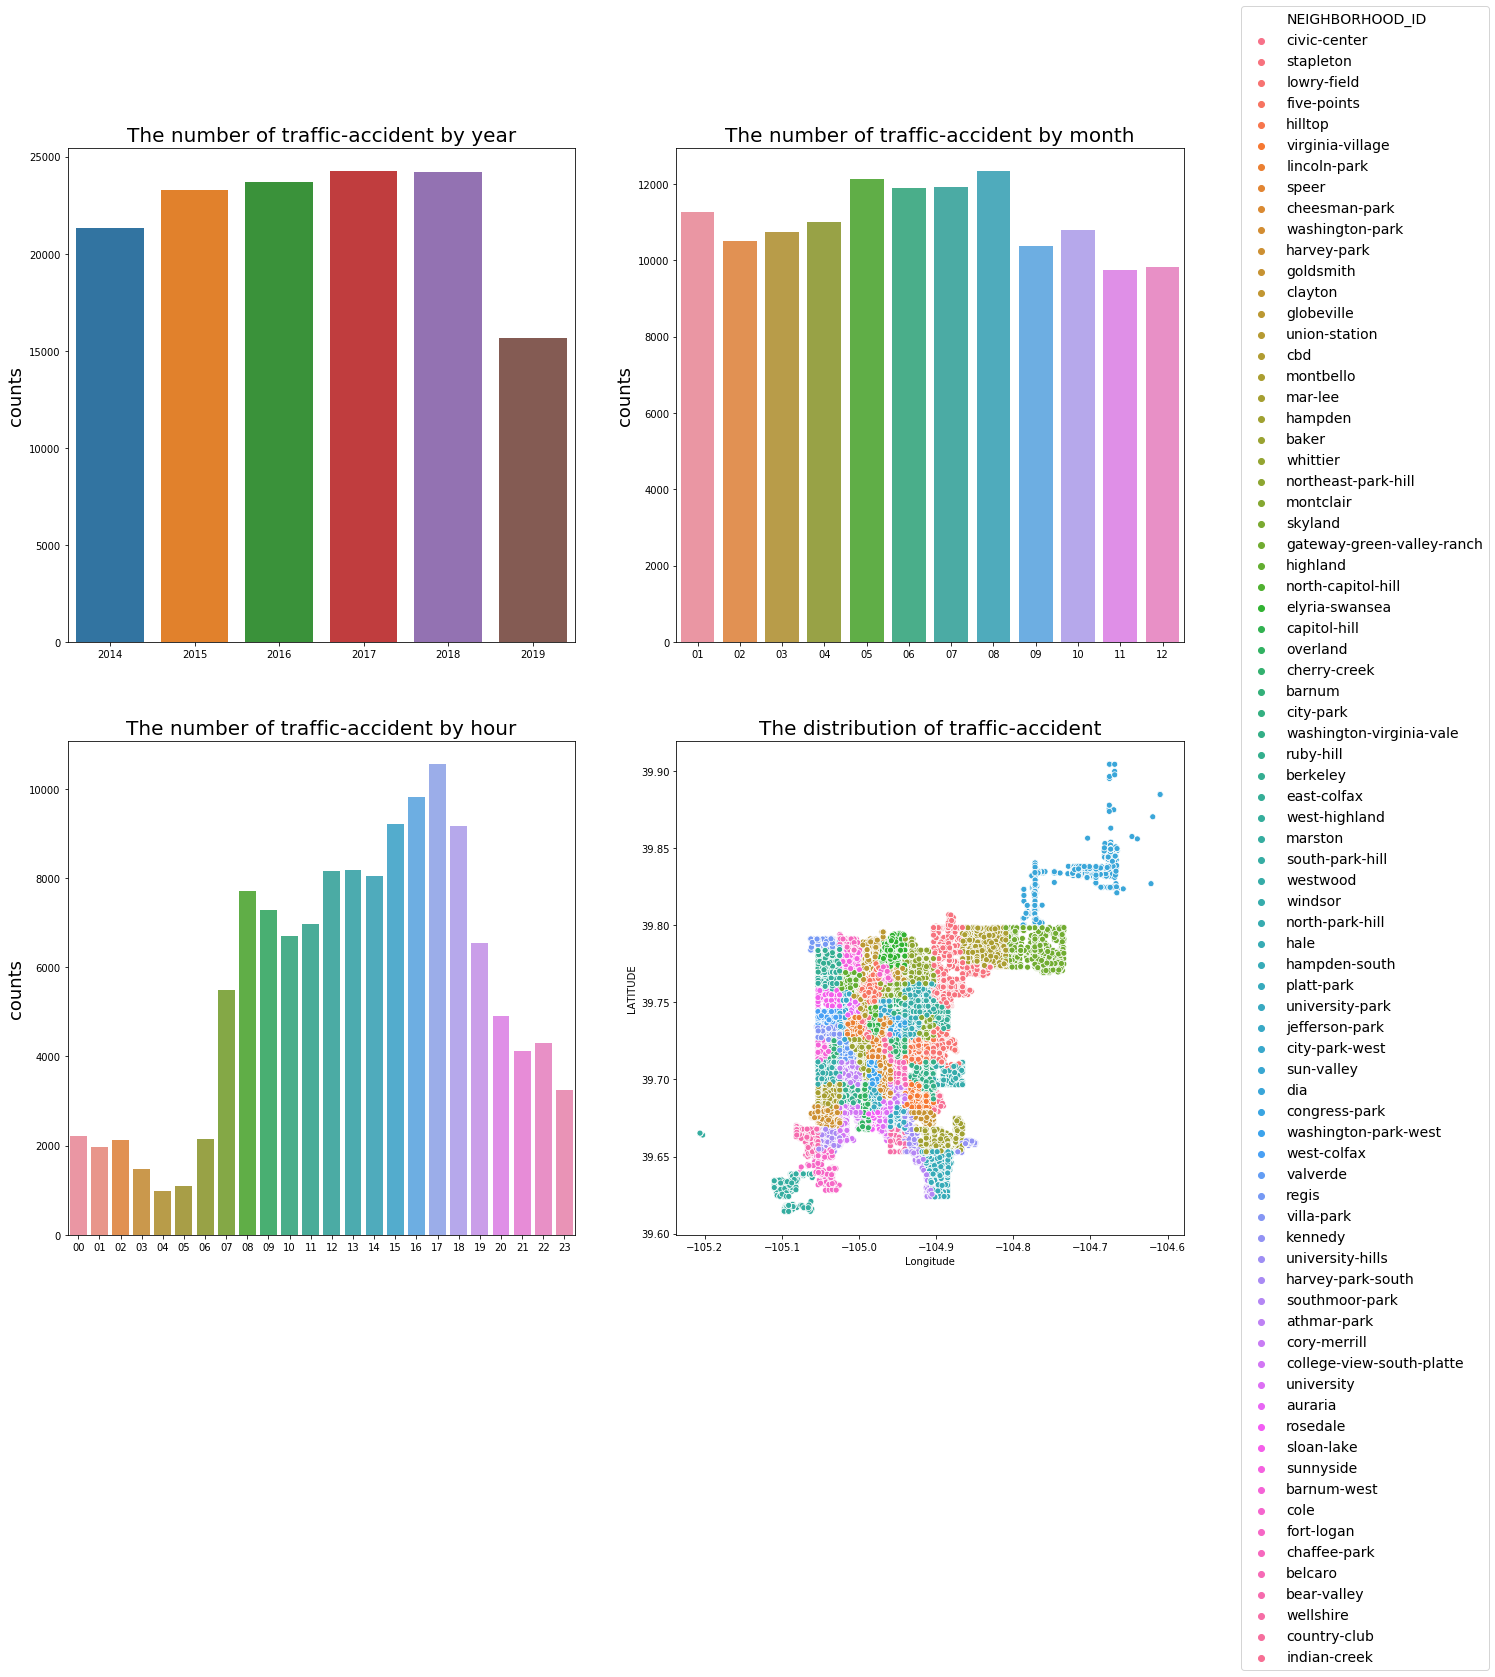

In [13]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=data_traf.year.value_counts()
x=data_traf.year.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The number of traffic-accident by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')


y=data_traf.month.value_counts()
x=data_traf.month.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The number of traffic-accident by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

y=data_traf.hour.value_counts()
x=data_traf.hour.value_counts().index
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The number of traffic-accident by hour",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')


sns.scatterplot(x="GEO_LON", y="GEO_LAT", hue="NEIGHBORHOOD_ID",data=data_traf,ax=ax[1,1])
ax[1,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,2.5))
ax[1,1].set_title("The distribution of traffic-accident",size=20)
ax[1,1].set(xlabel='Longitude', ylabel='LATITUDE')

In [14]:
data_IS_TRAFFIC=data[data.IS_TRAFFIC==1]
data_IS_TRAFFIC.head()

INCIDENT_ID       OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
8     201870833  201870833540100          5401                       0   
19    201871381  201871381544100          5441                       0   
21    201869050  201869050544100          5441                       0   
22    201872028  201872028540100          5401                       0   
43    201871958  201871958544100          5441                       0   

                 OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  FIRST_OCCURRENCE_DATE  \
8   traffic-accident-hit-and-run    traffic-accident   1/30/2018 9:10:00 AM   
19              traffic-accident    traffic-accident  1/30/2018 12:38:00 PM   
21              traffic-accident    traffic-accident   1/29/2018 2:16:00 PM   
22  traffic-accident-hit-and-run    traffic-accident   1/30/2018 3:45:00 PM   
43              traffic-accident    traffic-accident   1/30/2018 4:39:00 PM   

   LAST_OCCURRENCE_DATE       REPORTED_DATE               INCIDENT_ADDRESS  \
8                   NaN 2018-01-30 09:17:00     W 13TH AVE / N CHEROKEE ST   
19                  NaN 2018-01-30 12:38:00        N HAVANA ST / I70 HWYWB   
21                  NaN 2018-01-29 15:00:00  E LOWRY BLVD / N YOSEMITE WAY   
22                  NaN 2018-01-30 17:13:00            29TH ST / WELTON ST   
43                  NaN 2018-01-30 17:30:00           E 6TH AVE / N IVY LN   

    ...     GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID  NEIGHBORHOOD_ID  \
8   ... -104.991650  39.736863            6          611     civic-center   
19  ... -104.865745  39.775833            5          511        stapleton   
21  ... -104.883909  39.723506            3          321      lowry-field   
22  ... -104.975646  39.756668            2          211      five-points   
43  ... -104.920437  39.725338            3          321          hilltop   

    IS_CRIME IS_TRAFFIC  year  month hour  
8          0          1  2018     01   09  
19         0          1  2018     01   12  
21         0          1  2018     01   15  
22         0          1  2018     01   17  
43         0          1  2018     01   17  

[5 rows x 22 columns]

According to the map,you can see the distribution of traffic-accident by year clearly.If the circle is more large,the traffic-accidents are happened more frequently in this area. I only show top 2000 data on the map.Since it can not show on the map if the data size too large in KAGGLE.

In [15]:
data_IS_TRAFFIC=data_IS_TRAFFIC[:2000]
colors = {'2014' : 'red', '2015' : 'blue','2016' :'green','2017':'brown','2018':'plum','2019':'purple'}
Long=data_IS_TRAFFIC.GEO_LON.mean()
Lat=data_IS_TRAFFIC.GEO_LAT.mean()
data_IS_TRAFFIC_map=folium.Map([Lat,Long],zoom_start=12)
for i in range(len(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index)):
    lat,lon=data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count').index[i]
    folium.Circle(location=[lat,lon],
    popup=data_IS_TRAFFIC.iloc[i]['OFFENSE_TYPE_ID'],
    radius=int(data_IS_TRAFFIC.groupby(['GEO_LAT','GEO_LON'])['INCIDENT_ID'].agg('count')[i])*70,
    fill=True,
    fill_color=colors[data_IS_TRAFFIC['year'].iloc[i]],
    fill_opacity=0.7,).add_to(data_IS_TRAFFIC_map)

data_IS_TRAFFIC_map

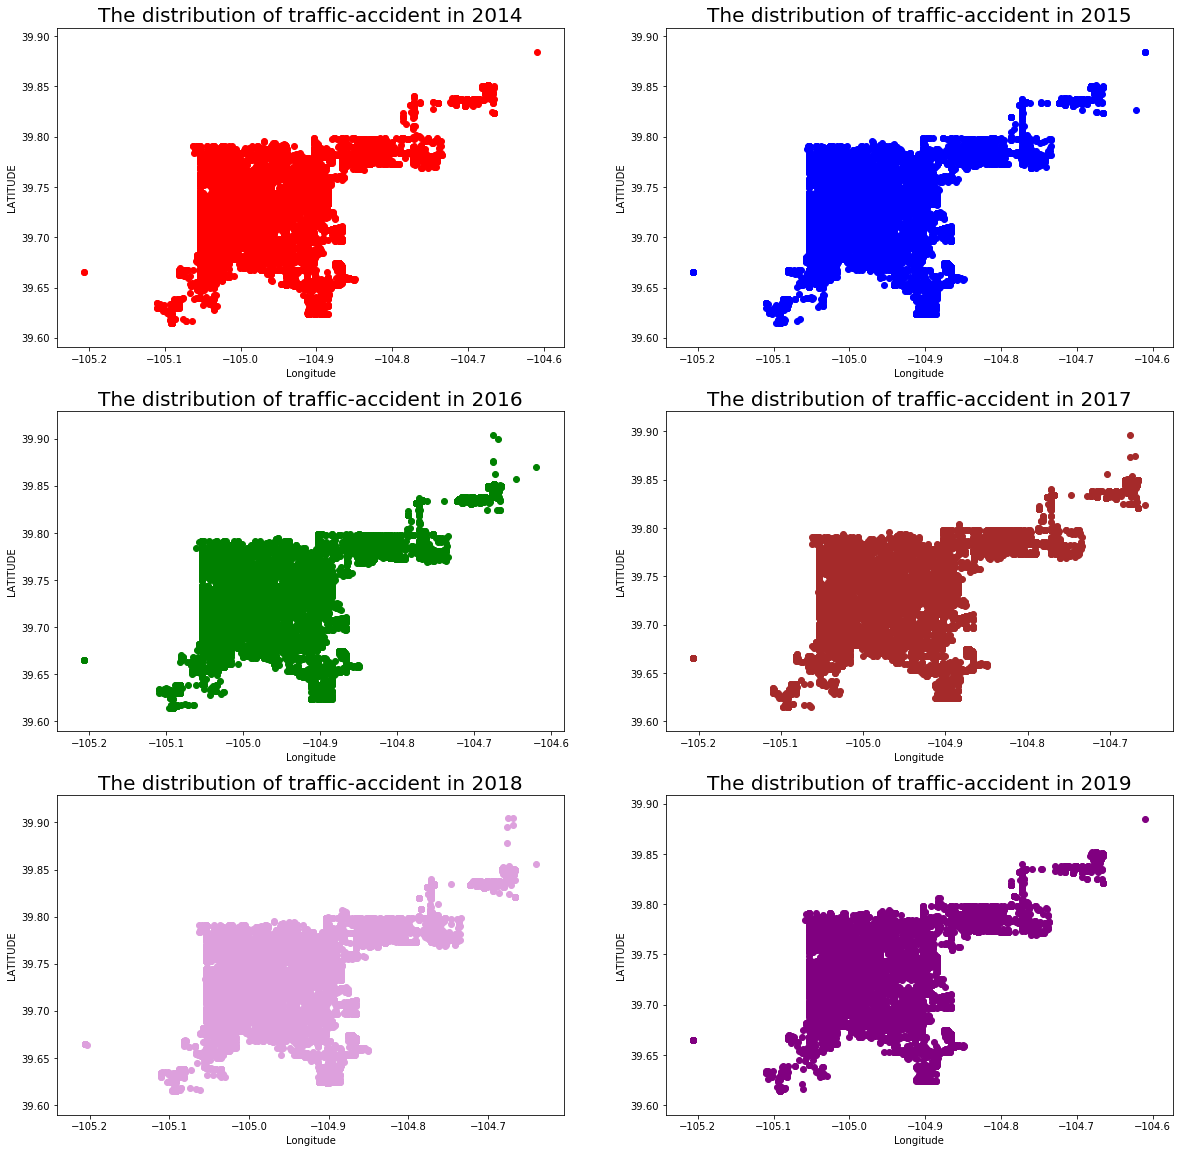

In [16]:
data_IS_TRAFFIC=data[data.IS_TRAFFIC==1]
plt.figure(figsize=(20,20))
for i in range(6):
    traffic=data_IS_TRAFFIC[data_IS_TRAFFIC.year==str(2014+i)]
    plt.subplot(3,2,i+1)
    plt.scatter('GEO_LON', 'GEO_LAT', data=traffic, c=colors[traffic['year'].iloc[0]])
    plt.title("The distribution of traffic-accident in "+str(2014+i),size=20)
    plt.xlabel('Longitude')
    plt.ylabel('LATITUDE')

<h3 id="24">2.4 visualization for 'larceny'</h3>

In [17]:
data_larceny=data[data.OFFENSE_CATEGORY_ID=='larceny']
data_larceny.head()

INCIDENT_ID         OFFENSE_ID  OFFENSE_CODE  OFFENSE_CODE_EXTENSION  \
1   20186000994  20186000994239900          2399                       0   
3     201872333    201872333239900          2399                       0   
4    2017411405   2017411405230300          2303                       0   
12   2016340553   2016340553230300          2303                       0   
14   2016236602   2016236602230300          2303                       0   

   OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID   FIRST_OCCURRENCE_DATE  \
1      theft-other             larceny  10/11/2017 12:30:00 PM   
3      theft-other             larceny    1/30/2018 7:20:00 PM   
4   theft-shoplift             larceny    6/22/2017 8:53:00 PM   
12  theft-shoplift             larceny    5/31/2016 4:54:00 PM   
14  theft-shoplift             larceny    4/16/2016 3:25:00 PM   

     LAST_OCCURRENCE_DATE       REPORTED_DATE      INCIDENT_ADDRESS  ...  \
1   10/11/2017 4:55:00 PM 2018-01-29 17:53:00                   NaN  ...   
3                     NaN 2018-01-30 22:29:00   705 S COLORADO BLVD  ...   
4                     NaN 2017-06-23 16:09:00        2810 E 1ST AVE  ...   
12                    NaN 2016-05-31 18:30:00  1505 S COLORADO BLVD  ...   
14                    NaN 2016-04-16 16:06:00       950 S QUEBEC ST  ...   

       GEO_LON    GEO_LAT  DISTRICT_ID  PRECINCT_ID  \
1  -104.781434  39.785649            5          522   
3  -104.941440  39.702698            3          312   
4  -104.955370  39.717107            3          311   
12 -104.942153  39.689021            3          312   
14 -104.902812  39.699214            3          321   

               NEIGHBORHOOD_ID  IS_CRIME IS_TRAFFIC  year  month hour  
1   gateway-green-valley-ranch         1          0  2018     01   17  
3                      belcaro         1          0  2018     01   22  
4                 cherry-creek         1          0  2017     06   16  
12                cory-merrill         1          0  2016     05   18  
14                     windsor         1          0  2016     04   16  

[5 rows x 22 columns]

[Text(0, 0.5, 'LATITUDE'), Text(0.5, 0, 'Longitude')]

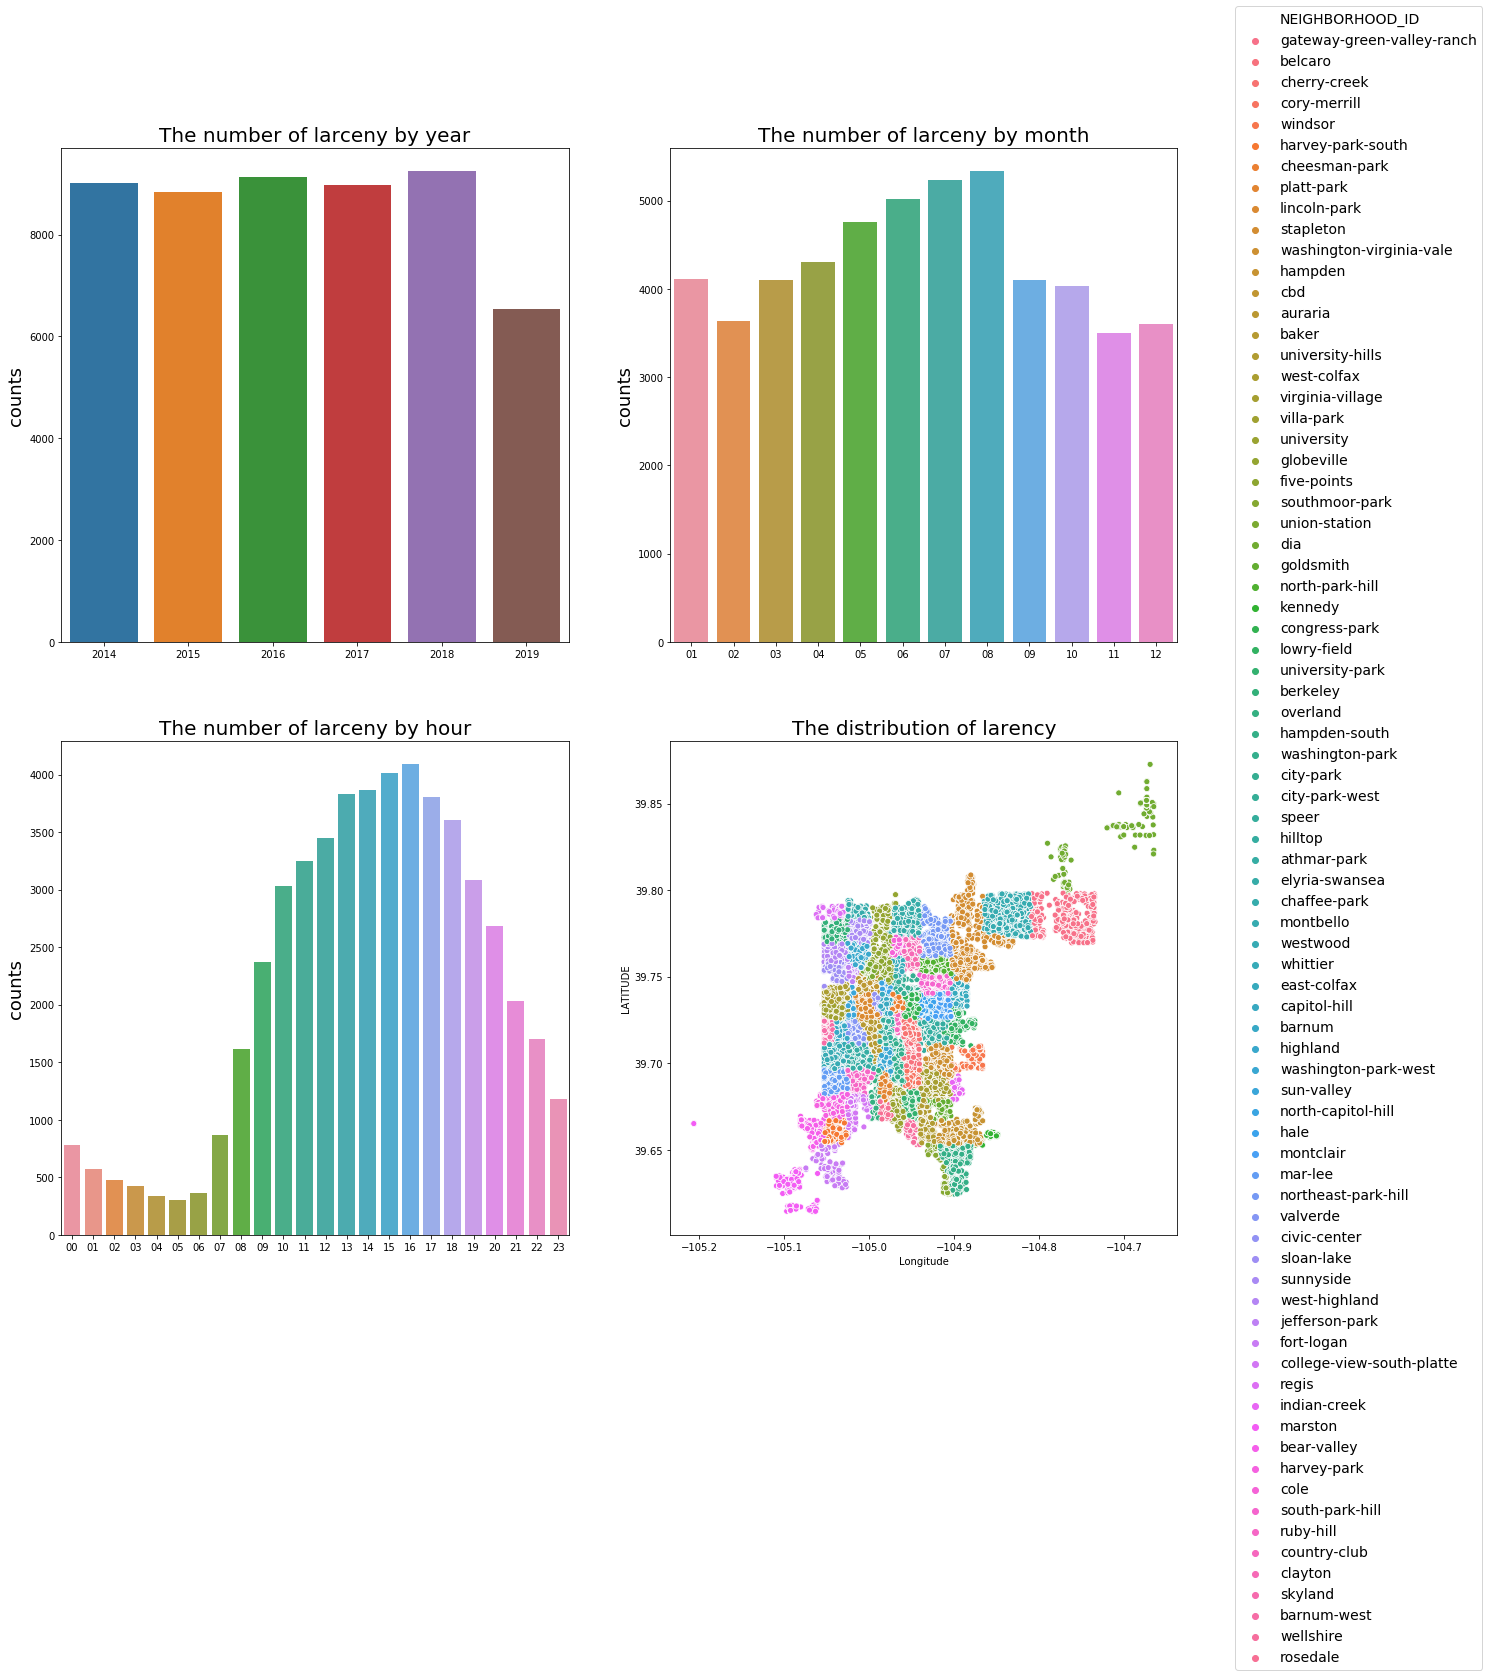

In [18]:
fig,ax=plt.subplots(2,2,figsize=(20,20))
y=data_larceny.year.value_counts()
x=data_larceny.year.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,0])
ax[0,0].set_title("The number of larceny by year",size=20)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('')


y=data_larceny.month.value_counts()
x=data_larceny.month.value_counts().index
sns.barplot(x=x,y=y,ax=ax[0,1])
ax[0,1].set_title("The number of larceny by month",size=20)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('')

y=data_larceny.hour.value_counts()
x=data_larceny.hour.value_counts().index
sns.barplot(x=x,y=y,ax=ax[1,0])
ax[1,0].set_title("The number of larceny by hour",size=20)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('')


sns.scatterplot(x="GEO_LON", y="GEO_LAT", hue="NEIGHBORHOOD_ID",data=data_larceny,ax=ax[1,1])
ax[1,1].legend(loc=0, ncol=1, fontsize=14,bbox_to_anchor=(1.10,2.5))
ax[1,1].set_title("The distribution of larency",size=20)
ax[1,1].set(xlabel='Longitude', ylabel='LATITUDE')

<h3 id="25">2.5 visualization for 'NEIGHBORHOOD_ID'</h3>

From the rank plot, the neighborhood is dangerous if the area of the plot is large.

In [19]:
def rank_NEIGHBORHOOD(NEIGHBORHOOD_ID):
    year=['2014','2015','2016','2017','2018','2019']
    B={}
    for i in range(len(year)):
        A=data[data.year==year[i]]
        value=A.groupby(['NEIGHBORHOOD_ID'])['OFFENSE_ID'].agg('count')
        rank=A.groupby(['NEIGHBORHOOD_ID'])['OFFENSE_ID'].agg('count').rank(method='min',ascending=False)
        new=pd.DataFrame({'rank':rank,'value':value})
        B['rank '+year[i]]=str(new[new.index==NEIGHBORHOOD_ID].iloc[0,0])+"/"+str(max(rank))
        B['value '+year[i]]=str(new[new.index==NEIGHBORHOOD_ID].iloc[0,1])

    return B

In [20]:
def rank_plot(NEIGHBORHOOD_ID):
    ID=rank_NEIGHBORHOOD(NEIGHBORHOOD_ID)
    y=[]
    x=[]
    n=[]
    for i in range(6):
        r1,r2=ID['rank '+str(i+2014)].split('/')
        R=float(r1)/float(r2)
        R=1-R
        y.append(1.5+R*math.sin(0+i*2*math.pi/6))
        x.append(1.5+R*math.cos(0+i*2*math.pi/6))
        n.append('rank '+str(i+2014)+' '+ID['rank '+str(i+2014)])
    
    x.append(x[0])
    y.append(y[0])
    plt.plot(x,y, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
    for i, txt in enumerate(n):
        plt.annotate(txt, (x[i], y[i]))
        plt.xlim(0.45,2.7)
        plt.ylim(0.45,2.7)
        plt.fill(x, y,"plum")
        plt.plot( 1.5, 1.5, marker='o', markerfacecolor='blue', markersize=8, linewidth=2)
        plt.title("The rank of the number of crime by year in "+NEIGHBORHOOD_ID,size=18) 

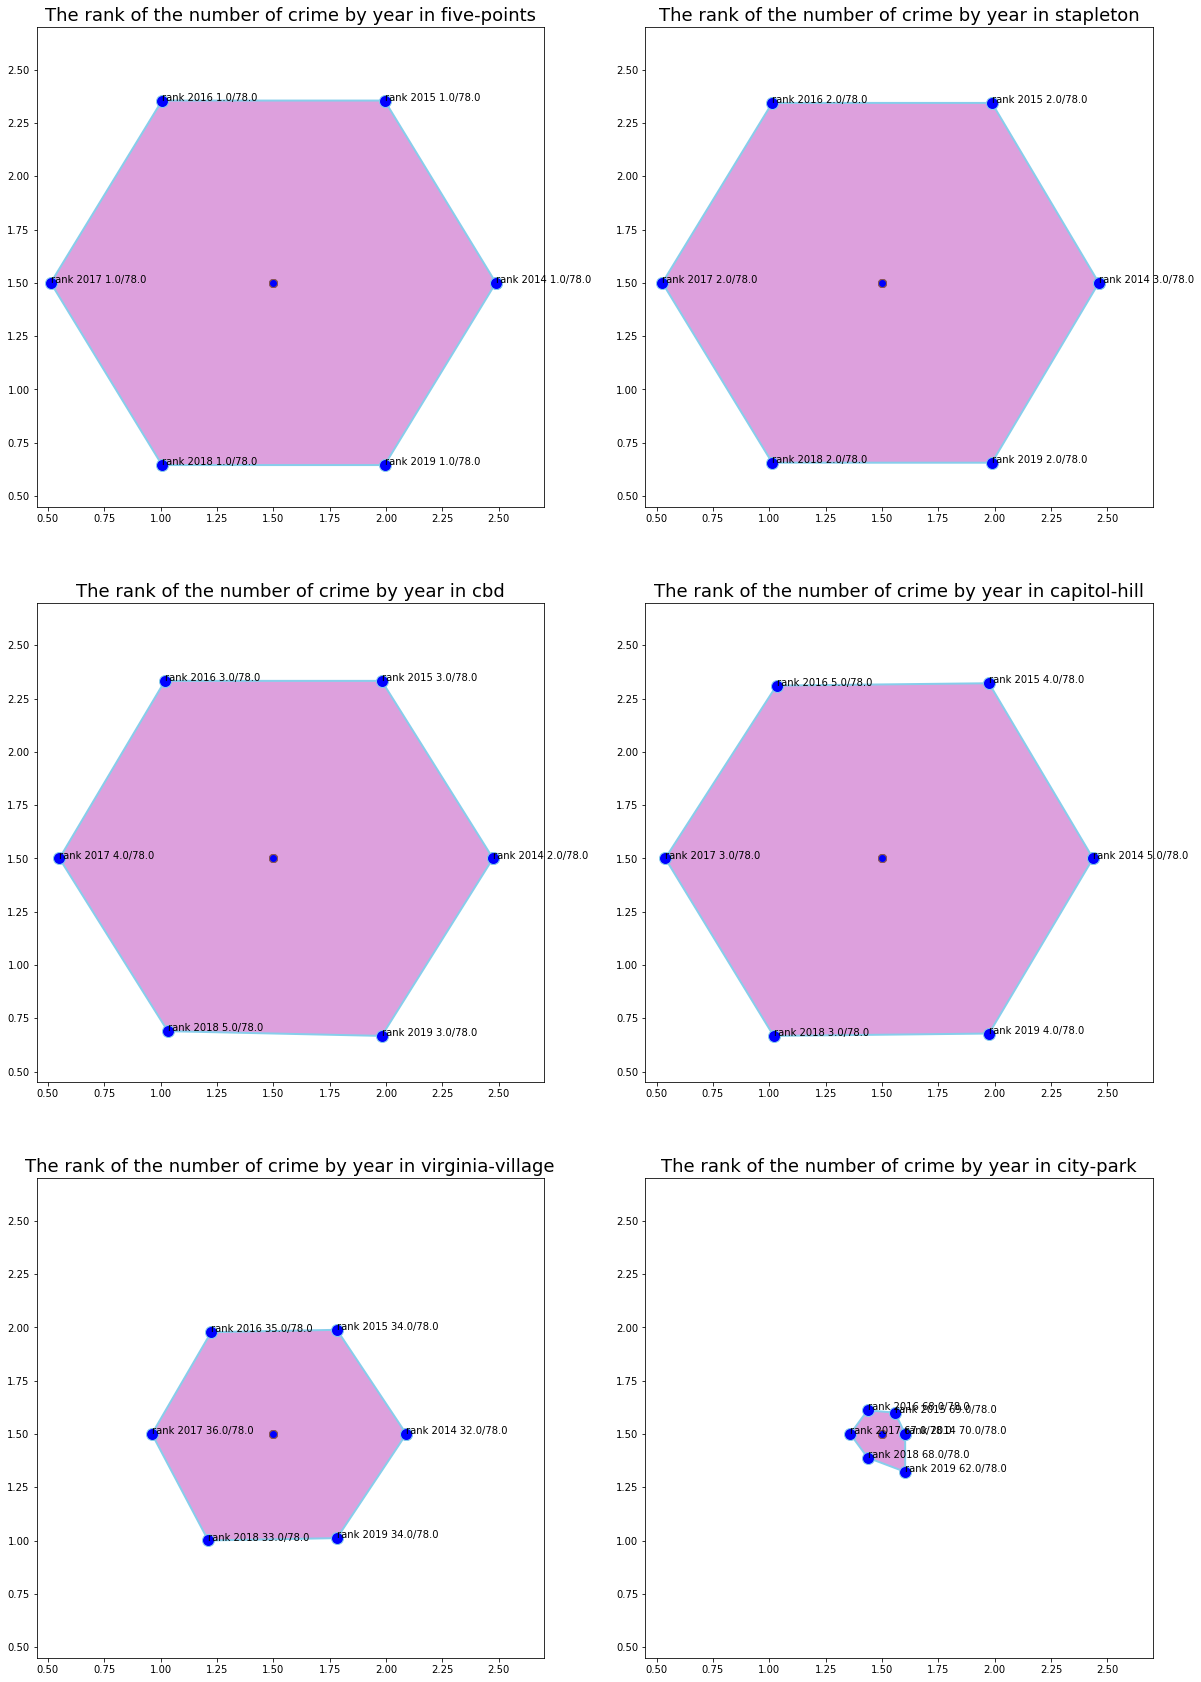

In [21]:
plt.figure(figsize=(20,30))
plt.subplot(3,2,1)
rank_plot('five-points')
plt.subplot(3,2,2)
rank_plot('stapleton')
plt.subplot(3,2,3)
rank_plot('cbd')
plt.subplot(3,2,4)
rank_plot('capitol-hill')
plt.subplot(3,2,5)
rank_plot('virginia-village')
plt.subplot(3,2,6)
rank_plot('city-park')

# 3.Suggestion

1.From the rank plot,the neighborhood is dangerous if the area of the plot is large.Police have to pay more attention to five-points,stapleton,cbd,and capitol-hill.

2.According to the following chart from 2.2,we know that the crime almost are happened at 12~18 o'clock.

3.From the bar chart of 2.1, we know that the most of crime type is traffic-accident in this data.